<a href="https://colab.research.google.com/github/qasimramzankbk/Qasi/blob/main/DISTPROGRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Distributions
Part of the Bayesian neural networks via MCMC: a Python-based tutorial

This section of the tutorial covers the some basic types of probability distributions.

In [1]:
import numpy as np
from numpy import random
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st
import scipy.stats as ss
import numpy as np
from scipy.integrate import quad, IntegrationWarning
from math import sqrt
from scipy.stats import norm, gamma, invgamma

import warnings
import time
import requests
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
from scipy.optimize import minimize

from IPython.display import FileLink, display
from numpy.random import gamma as rgamma  # rename so we can use gamma for parameter name
from __future__ import division
import os
import sys
import glob
#! pip install corner
#import corner  # Formerly triangle

 

# Practical Data Implimintation

This data set contains 20 observations of flood data. It was analyzed by [39]. The data set is listed as follows: 
{0.265, 0.392, 0.297, 0.3235, 0.402, 0.269, 0.315, 0.654, 0.338, 0.379, 0.418, 0.423, 0.379, 0.412, 0.416, 0.449, 0.484, 0.494, 0.613, 0.74}.

A. M. Sarhan, A. I. El-Gohary, A. Mustafa and A. H. Tolba, Statistical analysis of regression competing risks model with covariates using Weibull sub-distributions, International Journal of Reliability and Applications , 20(2),73–88, 2019.
 discussed the following data :
 0.77, 1.74, 0.81, 1.20, 1.95, 1.20, 0.47, 1.43, 3.37, 2.20, 3.00, 3.09, 1.51, 2.10, 0.52,1.62, 1.31, 0.32, 0.59, 0.81, 2.81, 1.87, 1.18, 1.35, 4.75, 2.48, 0.96, 1.89, 0.90, 2.05, 
which shows precipitation levels in inches recorded during the month of search within the Minneapolis-St. Paul area over a 30-year period.
 


In [2]:
'''# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Data
data = np.array([0.040, 1.866, 2.385, 3.443, 0.301, 1.876, 2.481, 3.467, 0.309
       , 1.899, 2.610, 3.478, 0.557, 1.911, 2.625, 3.578, 0.943, 1.912,
       2.632, 3.595, 1.070, 1.914, 2.646, 3.699, 1.124, 1.981, 2.661,
       3.779, 1.248, 2.010, 2.688, 3.924, 1.281, 2.038, 2.82,3, 4.035,
       1.281, 2.085, 2.890, 4.121, 1.303, 2.089, 2.902, 4.167, 1.432,
       2.097, 2.934, 4.240, 1.480, 2.135, 2.962, 4.255, 1.505, 2.154,
       2.964, 4.278, 1.506, 2.190, 3.000, 4.305, 1.568, 2.194, 3.103,
       4.376, 1.615, 2.223, 3.114, 4.449, 1.619, 2.224, 3.117, 4.485,
       1.652, 2.229, 3.166, 4.570, 1.652, 2.300, 3.344, 4.602, 1.757,
       2.324, 3.376, 4.663])
min_value = np.min(data) - np.min(data)/2
max_value = np.max(data) + np.min(data)/2

print(data)
print(len(data))'''

'# Suppress specific warnings\nwarnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")\n\n# Data\ndata = np.array([0.040, 1.866, 2.385, 3.443, 0.301, 1.876, 2.481, 3.467, 0.309\n       , 1.899, 2.610, 3.478, 0.557, 1.911, 2.625, 3.578, 0.943, 1.912,\n       2.632, 3.595, 1.070, 1.914, 2.646, 3.699, 1.124, 1.981, 2.661,\n       3.779, 1.248, 2.010, 2.688, 3.924, 1.281, 2.038, 2.82,3, 4.035,\n       1.281, 2.085, 2.890, 4.121, 1.303, 2.089, 2.902, 4.167, 1.432,\n       2.097, 2.934, 4.240, 1.480, 2.135, 2.962, 4.255, 1.505, 2.154,\n       2.964, 4.278, 1.506, 2.190, 3.000, 4.305, 1.568, 2.194, 3.103,\n       4.376, 1.615, 2.223, 3.114, 4.449, 1.619, 2.224, 3.117, 4.485,\n       1.652, 2.229, 3.166, 4.570, 1.652, 2.300, 3.344, 4.602, 1.757,\n       2.324, 3.376, 4.663])\nmin_value = np.min(data) - np.min(data)/2\nmax_value = np.max(data) + np.min(data)/2\n\nprint(data)\nprint(len(data))'

Time:  0.024123668670654297
Rejection:  84513
Minimum value:  0.4706094439541564
Maximum value:  49.94397805307783


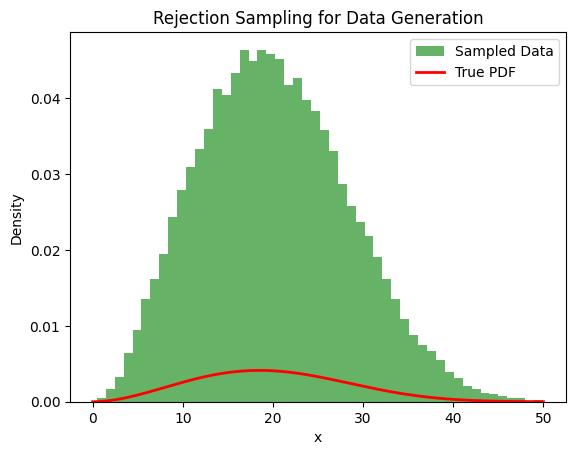

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


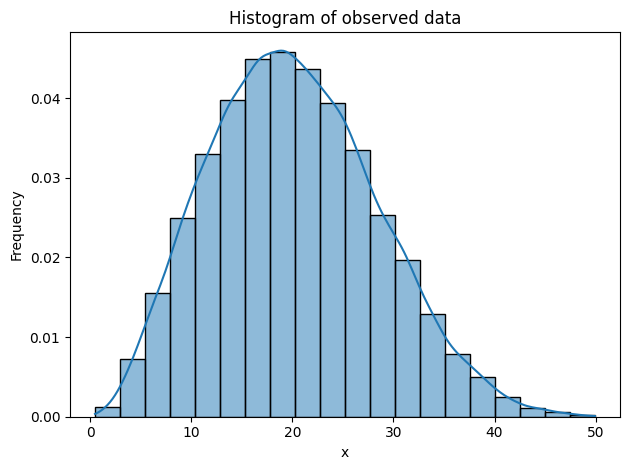

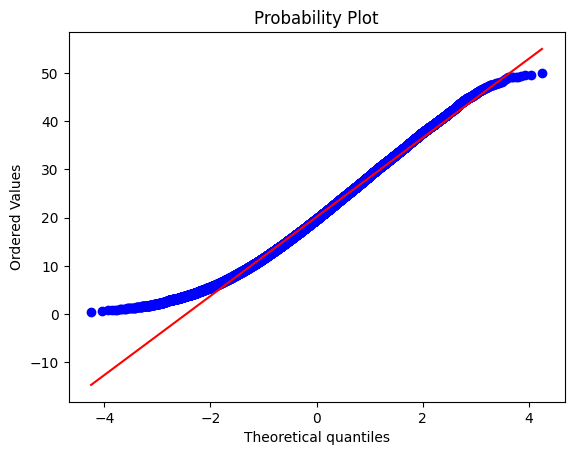

[17.30767055 18.68769604  7.90371218  6.29663643 17.19055355 24.25773394
  8.1896611  34.60119386 20.18526239 38.07197113 23.33560551 14.44516582
 20.84175231 27.50957708 21.7681498  16.44157761 20.55750937  5.49224485
 31.19408471 14.54055207 22.39782539 41.45685395 26.33505145 22.41497291
 29.13162856 11.82112146  7.78159511 33.32402175 22.15295859 21.61138147
  9.89136912 10.71985616 24.12705138 21.59745103 12.22149964 27.81189731
  3.84245119 32.29434945 27.17114168 32.84828895 19.14837352 17.73823841
 25.46809395 24.57882734  3.04672746 13.42297391 21.340921   22.9509853
 39.90658496  9.07846316]
50


In [3]:

# Define the custom gamma PDF function
def gamma_pdf(gamma_param, theta, lambd, x):
    # Calculate common terms
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)
    
    # Calculate the main components of the expression
    numerator = gamma_param * (theta ** 2) * x * term2
    inner_term = 1 - term1 * term2
    numerator_exp = (inner_term ** lambd)
    denominator_exp = (1 - inner_term ** lambd) ** 2
    
    # Calculate the exponential part
    exp_term = np.exp(-gamma_param * numerator_exp / (1 - inner_term ** lambd))
    
    # Final expression
    result = numerator * (numerator_exp / denominator_exp) * exp_term
    
    return result

# Parameters for the custom gamma distribution
gamma_param, theta, lambd = 1.2, 0.03, 0.5

# Define the range for x values
a = 0   # xmin
b = 50   # xmax

# Find the maximum value of the PDF for scaling
x_values = np.linspace(a, b, 1000)
pdf_values = gamma_pdf(gamma_param, theta, lambd, x_values)
m = np.max(pdf_values)  # ymax

variables = []  # list for variables
reject = 0      # number of rejections
start = time.time()

# Number of samples before accept-reject
n_before_accept_reject = 150000
u1 = np.random.uniform(a, b, size=n_before_accept_reject)
u2 = np.random.uniform(0, m, size=n_before_accept_reject)

# Perform rejection sampling
variables = u1[u2 <= gamma_pdf(gamma_param, theta, lambd, u1)]
accept = np.extract(variables>=0.0, variables)
reject = n_before_accept_reject - len(accept)

#reject = n_before_accept_reject - len(variables)

end = time.time()

print("Time: ", end - start)
print("Rejection: ", reject)
# Find the minimum and maximum values
min_value = variables.min()
max_value = variables.max()
 
print("Minimum value: ", min_value)
print("Maximum value: ", max_value)
# Plot the results
x = np.linspace(a, b, 1000)
plt.hist(variables, 50, density=True, alpha=0.6, color='g', label='Sampled Data')
plt.plot(x, gamma_pdf(gamma_param, theta, lambd, x), 'r-', lw=2, label='True PDF')
plt.title('Rejection Sampling for Data Generation')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.savefig('datagen.png')
plt.show()
# Create a link to download the file
#FileLink(r'/kaggle/working/GOF1.png')

ax = plt.subplot()
sns.histplot(variables, kde=True, bins=20, ax=ax, stat="density") # smooth using KDE: https://en.wikipedia.org/wiki/Kernel_density_estimation
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='Frequency');
plt.tight_layout()
plt.savefig('hiscurv.png')
plt.show()
#FileLink(r'/kaggle/working/GOF2.png')

None

# Q-Q plot to compare the sampled data to the theoretical distribution
ss.probplot(variables, dist="norm", plot=plt)
plt.savefig('QQPlot.png')
plt.show()
 
'''class my_pdf(ss.rv_continuous):
    def _pdf(self, x):
        return 1.5 * (1.0 - x*x)

ss.probplot(accept, dist=my_pdf(a=a, b=b, name='my_pdf'), plot=plt)
'''
data = np.random.choice(variables, size=50, replace=False)
min_value = np.min(data) - np.min(data)/2
max_value = np.max(data) + np.min(data)/2
print(data)
print(len(data))

In [4]:
from zipfile import ZipFile
import os

zipObj = ZipFile('yourzipfilename.zip', 'w')

for filename in os.listdir("/kaggle/working"):
    if filename.endswith(".png"):
        zipObj.write(filename)
zipObj.close()


In [5]:
# Generate some data from a normal distribution
np.random.seed(42)
gamma_param =1
# Example data
x = data#variables[variables != 0]
# Define the negative log-likelihood function
def neg_log_likelihood(params, data, gamma=1):
    theta, lambd = params
    epsilon = 1e-10
    safe_data = np.maximum(data, epsilon)
    
    term1 = 1 + 2 * theta * safe_data
    term2 = np.exp(-2 * theta * safe_data)

    safe_term1_term2 = np.maximum(term1 * term2, epsilon)
    safe_denominator = np.maximum(1 - (1 - term1 * term2) ** lambd, epsilon)
    safe_numerator_exp = np.maximum((1 - term1 * term2) ** lambd, epsilon)

    ll = (
        np.log(gamma * theta**2 * safe_data) -
        2 * theta * safe_data +
        lambd * np.log(1 - safe_term1_term2) -
        2 * np.log(safe_denominator) -
        gamma * safe_numerator_exp / safe_denominator
    )

    return -ll.sum()

# Assuming data contains the generated data from the previous code

# Initial guess for theta and lambda
initial_guess = [0.3, 0.80]
# Assuming mu_MLE_constr and sig_MLE_constr are constrained MLE values for a hypothesis test
theta_MLE_constr, lambda_MLE_constr = initial_guess[0], initial_guess[1]  # Example constrained values, replace with actual values if needed
# Perform the optimization to find the MLE for theta and lambda   1e-10
results_uncstr = opt.minimize(neg_log_likelihood, initial_guess, args=(data,), method='L-BFGS-B', bounds=[(0.001, None), (0.0001, None)])
result = results_uncstr
theta_MLE, lambda_MLE = results_uncstr.x

# Calculate the variance-covariance matrix
vcv_mle = results_uncstr.hess_inv.todense()

# Standard errors for the estimates
stderr_theta_mle = np.sqrt(vcv_mle[0,0])
stderr_lambda_mle = np.sqrt(vcv_mle[1,1])

print(result)

# Extract the MLE estimates
theta_mle, lambd_mle = result.x
print(f"MLE estimates: theta={theta_mle:.2f}, lambd={lambd_mle:.2f}")


print('Inverse Hessian:')
print(result.hess_inv.todense())

print('VCV(MLE) = ')
print(vcv_mle)
print('Standard error for theta estimate = ', stderr_theta_mle)
print('Standard error for lambda estimate = ', stderr_lambda_mle)

import scipy.stats as sts

# Calculating the confidence intervals
lb_theta_95pctci = theta_MLE - 2 * stderr_theta_mle
print('theta_MLE =', theta_MLE, ', lower bound 95% conf. int. =', lb_theta_95pctci)

lb_lambda_95pctci = lambda_MLE - 2 * stderr_lambda_mle
print('lambda_MLE =', lambda_MLE, ', lower bound 95% conf. int. =', lb_lambda_95pctci)

# Calculate the log-likelihood for the hypothesis values
log_lik_h0 = -neg_log_likelihood([theta_MLE_constr, lambda_MLE_constr], data)
print('hypothesis value log likelihood', log_lik_h0)

# Calculate the log-likelihood for the MLE values
log_lik_mle = -neg_log_likelihood([theta_MLE, lambda_MLE], data)
print('MLE log likelihood', log_lik_mle)

# Likelihood ratio test
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)

# Calculate p-value
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2178439653.937199
        x: [ 3.000e-01  1.800e+00]
      nit: 2
      jac: [ 1.869e+11 -3.599e+07]
     nfev: 66
     njev: 22
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
MLE estimates: theta=0.30, lambd=1.80
Inverse Hessian:
[[9.99996189e-01 1.16110250e+03]
 [1.16110250e+03 1.34816416e+06]]
VCV(MLE) = 
[[9.99996189e-01 1.16110250e+03]
 [1.16110250e+03 1.34816416e+06]]
Standard error for theta estimate =  0.999998094410625
Standard error for lambda estimate =  1161.104715557722
theta_MLE = 0.2999999983588133 , lower bound 95% conf. int. = -1.6999961904624368
lambda_MLE = 1.7999999999998337 , lower bound 95% conf. int. = -2320.4094311154445
hypothesis value log likelihood -4901490728.169513
MLE log likelihood -2178439653.937199
likelihood ratio value 5446102148.464627
chi squared of H0 with 2 degrees of freedom p-value =  0.0


In [6]:
 
# Ignore integration warnings
warnings.filterwarnings("ignore", category=IntegrationWarning)

# Define a small epsilon value to avoid division by zero
epsilon = 1e-10

# Define the integrand for the m(x, theta, alpha) function
def integrand_m(u, gamma_param, theta, lambd):
    term1 = 1 + 2 * theta * u
    term2 = np.exp(-2 * theta * u)
    inner_term = 1 - term1 * term2
    numerator_exp = inner_term ** lambd
    denominator_exp = (1 - numerator_exp) ** 2
    exp_term = np.exp(-gamma_param * numerator_exp / (1 - numerator_exp + epsilon))
    result = u ** 2 * term2 * numerator_exp / (denominator_exp + epsilon) * exp_term
    return result

# Define the m(x, theta, alpha) function
def m_function(x, gamma_param, theta, lambd):
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)
    inner_term = 1 - term1 * term2
    numerator_exp = inner_term ** lambd
    exp_term = np.exp(-gamma_param * numerator_exp / (1 - numerator_exp + epsilon))
    prefactor = gamma_param * (theta ** 2) / (exp_term + epsilon)
    
    integral, _ = quad(integrand_m, x, np.inf, args=(gamma_param, theta, lambd))
    
    result = prefactor * integral - x
    return result
 
 # Define the integrand for the w(x, theta, alpha) function
def integrand_w(u, gamma_param, theta, lambd):
    term1 = 1 + 2 * theta * u
    term2 = np.exp(-2 * theta * u)
    inner_term = 1 - term1 * term2
    numerator_exp = inner_term ** lambd
    denominator_exp = (1 - numerator_exp) ** 2
    exp_term = np.exp(-gamma_param * numerator_exp / (1 - numerator_exp + epsilon))
    result = u ** 2 * term2 * numerator_exp / (denominator_exp + epsilon) * exp_term
    return result

# Define the w(x, theta, alpha) function
def w_function(x, gamma_param, theta, lambd):
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)
    inner_term = 1 - term1 * term2
    numerator_exp = inner_term ** lambd
    exp_term = np.exp(-gamma_param * numerator_exp / (1 - numerator_exp + epsilon))
    prefactor = gamma_param * (theta ** 2) / (1 - exp_term + epsilon)
    
    integral, _ = quad(integrand_w, 0, x, args=(gamma_param, theta, lambd))
    
    result = x - prefactor * integral
    return result
  
def gamma_pdf(gamma_param, theta, lambd, x):
    # Calculate common terms
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)

    # Calculate the main components of the expression
    numerator = gamma_param * (theta ** 2) * x * term2
    inner_term = 1 - term1 * term2
    numerator_exp = (inner_term ** lambd)
    denominator_exp = (1 - inner_term ** lambd) ** 2

    # Calculate the exponential part
    exp_term = np.exp(-gamma_param * numerator_exp / (1 - inner_term ** lambd))

    # Final expression
    result = numerator * (numerator_exp / denominator_exp) * exp_term

    return result

def gamma_hf(gamma_param, theta, lambd, x):
    # Calculate common terms
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)

    # Calculate the main components of the expression
    numerator = gamma_param * (theta ** 2) * x * term2
    inner_term = 1 - term1 * term2
    numerator_exp = (inner_term ** lambd)
    denominator_exp = (1 - numerator_exp) ** 2

    # Final expression
    result = numerator * (numerator_exp / (denominator_exp + epsilon))

    return result
 
def gamma_sf(gamma_param, theta, lambd, x):
    # Calculate common terms
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)

    # Calculate the main components of the expression
    numerator = gamma_param * (theta ** 2) * x * term2
    inner_term = 1 - term1 * term2
    numerator_exp = (inner_term ** lambd)

    # Calculate the exponential part
    result = np.exp(-gamma_param * numerator_exp / (1 - numerator_exp + epsilon))

    return result

def gamma_rhrf(gamma_param, theta, lambd, x,  max_exp=1e50):
    # Calculate common terms
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)

    # Calculate the main components of the expression
    numerator = gamma_param * (theta ** 2) * x * term2
    inner_term = 1 - term1 * term2
    numerator_exp = (inner_term ** lambd)
    denominator_exp = (1 - inner_term ** lambd) ** 2

    # Calculate the exponential part with clipping to prevent overflow
    ex_term = np.clip(np.exp(gamma_param * numerator_exp / (1 - inner_term ** lambd + epsilon)), -max_exp, max_exp)

    # Final expression
    result = numerator * (numerator_exp / (denominator_exp + epsilon)) / (ex_term - 1 + epsilon)

    return result

def gamma_chf(gamma_param, theta, lambd, x ):
    # Calculate common terms
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)

    # Calculate the main components of the expression
    inner_term = 1 - term1 * term2
    numerator_exp = (inner_term ** lambd)

    # Calculate the exponential part
    result = gamma_param * numerator_exp / (1 - inner_term ** lambd + epsilon)

    return result


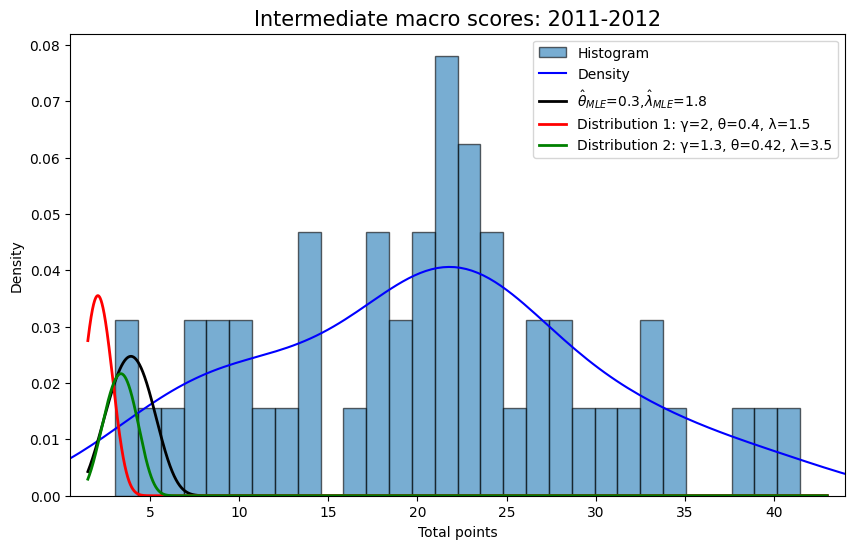

In [7]:
# Ignore specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

 # Create a histogram of the data
plt.figure(figsize=(10, 6))
num_bins = 30
count, bins, ignored = plt.hist(data, num_bins, density=True, alpha=0.6,
                                edgecolor='k', label='Histogram')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel('Total points')
plt.ylabel('Density')
plt.xlim([min_value - 1, max_value + 1])  # This gives the xmin and xmax to be plotted

# Add a KDE plot for the density
sns.kdeplot(data, color='blue', label='Density')

# Assuming you have MLE results
# Replace the following values with your actual MLE results
theta_MLE =  theta_mle
lambda_MLE = lambd_mle

# Generate points for plotting the PDF
dist_pts = np.linspace(min_value, max_value, 10000)


# Plot the MLE estimated distribution
plt.plot(dist_pts, gamma_pdf(1, theta_MLE, lambda_MLE, dist_pts), linewidth=2, color='k',
         label=f'$\hat{{θ}}_{{MLE}}$={round(theta_MLE, 2)},$\hat{{\lambda}}_{{MLE}}$={round(lambda_MLE, 2)}')

# Plot smooth line with distribution 1
gamma_1, theta_1, lambd_1 = 2, 0.4, 1.5
plt.plot(dist_pts, gamma_pdf(gamma_1, theta_1, lambd_1, dist_pts),
         linewidth=2, color='r', label=f'Distribution 1: γ={gamma_1}, θ={theta_1}, λ={lambd_1}')

# Plot smooth line with distribution 2
gamma_2, theta_2, lambd_2 = 1.3, 0.42, 3.5
plt.plot(dist_pts, gamma_pdf(gamma_2, theta_2, lambd_2, dist_pts),
         linewidth=2, color='g', label=f'Distribution 2: γ={gamma_2}, θ={theta_2}, λ={lambd_2}')

plt.legend(loc='upper right')
plt.savefig('gofcurvs.png')
plt.show()


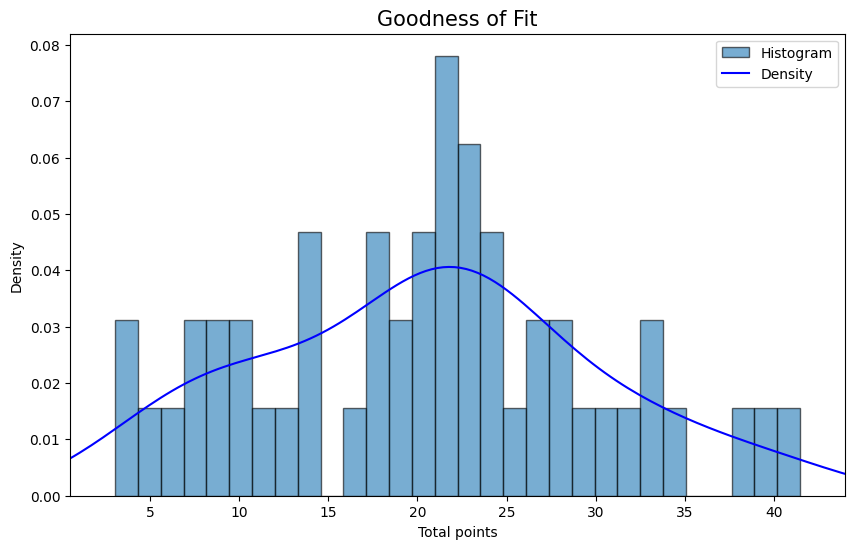

In [8]:
# Ignore specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

 # Create a histogram of the data
plt.figure(figsize=(10, 6))
num_bins = 30
count, bins, ignored = plt.hist(data, num_bins, density=True, alpha=0.6,
                                edgecolor='k', label='Histogram')
plt.title('Goodness of Fit', fontsize=15)
plt.xlabel('Total points')
plt.ylabel('Density')
plt.xlim([min_value - 1, max_value + 1])  # This gives the xmin and xmax to be plotted

# Add a KDE plot for the density
sns.kdeplot(data, color='blue', label='Density')

# Assuming you have MLE results
# Replace the following values with your actual MLE results
theta_MLE =  theta_mle
lambda_MLE = lambd_mle

# Generate points for plotting the PDF
dist_pts = np.linspace(min_value, max_value, 10000)


plt.legend(loc='upper right')
plt.savefig('gofcurvs.png')
plt.show()


In [9]:
# Generate the animation data
n_frames = len(data)
x = np.linspace(0, n_frames - 1, n_frames)
y = data

# Create an animated line plot
fig = go.Figure(
    data=go.Scatter(x=[0], y=[0], mode='lines+markers'),
    layout=go.Layout(
        updatemenus=[
            dict(
                type='buttons',
                showactive=False,
                buttons=[dict(label='Play', method='animate', args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)])]
            )
        ]
    )
)

# Add frames for animation
frames = [go.Frame(data=[go.Scatter(x=x[:i], y=y[:i], mode='lines+markers')]) for i in range(1, n_frames)]
fig.frames = frames

# Add title and labels
fig.update_layout(
    title='Animated Line Plot of Generated Numbers',
    xaxis_title='Index',
    yaxis_title='Generated Numbers',
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play', method='animate', args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)])]
        )
    ]
)
plt.savefig('dataplt.png')

# Show the plot
fig.show()
 

<Figure size 640x480 with 0 Axes>

In [10]:
# Create a basic line plot
fig = go.Figure(data=go.Scatter(x=dist_pts, y=data, mode='lines'))
# Add title and labels
fig.update_layout(title='Basic Line Plot', xaxis_title='X-axis', yaxis_title='Data')
# Show the plot
plt.savefig('linplt.png')
fig.show()
 

<Figure size 640x480 with 0 Axes>

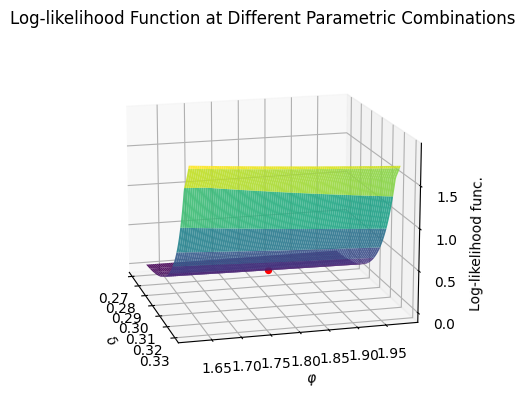

In [11]:
x = data


def log_likelihd(theta, lambd, x):

    n = len(x)
    term1 = 1 + 2 * theta * x
    term2 = np.exp(-2 * theta * x)

    # Add small constants to prevent log(0) and division by zero

    log_product_term = np.log(x ) + lambd * np.log(1 - term1 * term2 ) - 2 * np.log(1 - (1 - term1 * term2) ** lambd )
    sum_term = -2 * theta * np.sum(x) - gamma_param * np.sum((1 - term1 * term2) ** lambd / (1 - (1 - term1 * term2) ** lambd ))

    l_Theta = n * np.log(gamma_param * theta ** 2 ) + np.sum(log_product_term) + sum_term
    return -l_Theta

lnlik_MLE = log_likelihd(theta_MLE, lambda_MLE, data)

theta_buffer = 0.1
theta_vals = np.linspace(
    theta_MLE - theta_buffer * theta_MLE, theta_MLE + theta_buffer * theta_MLE, 90
)
lambda_buffer = 0.1
lambda_vals = np.linspace(
    lambda_MLE - lambda_buffer * lambda_MLE, lambda_MLE + lambda_buffer * lambda_MLE, 100
)

lnlik_vals = np.zeros((90, 100))
epsilon = 1e-10
gamma = 1  # Set gamma to 1

for theta_ind in range(90):
    for lambda_ind in range(100):
        theta = theta_vals[theta_ind]
        lambd = lambda_vals[lambda_ind]

        term1 = 1 + 2 * theta * data
        term2 = np.exp(-2 * theta * data)

        safe_data = np.maximum(data, epsilon)
        safe_term1_term2 = np.maximum(term1 * term2, epsilon)
        safe_denominator = np.maximum(1 - (1 - term1 * term2) ** lambd, epsilon)
        safe_numerator_exp = np.maximum((1 - term1 * term2) ** lambd, epsilon)

        ll = (
            np.log(gamma * theta**2 * safe_data) -
            2 * theta * data +
            lambd * np.log(1 - safe_term1_term2) -
            2 * np.log(safe_denominator) -
            gamma * safe_numerator_exp / safe_denominator
        )

        lnlik_vals[theta_ind, lambda_ind] = -ll.sum()

theta_mesh, lambda_mesh = np.meshgrid(theta_vals, lambda_vals)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(theta_mesh.T, lambda_mesh.T, lnlik_vals, rstride=8,
                cstride=1, cmap='viridis', alpha=0.9)
ax.scatter(theta_MLE, lambda_MLE, lnlik_MLE, color='red', marker='o',
           s=18, label='MLE estimate')
ax.view_init(elev=15, azim=-15, roll=0)
ax.set_title('Log-likelihood Function at Different Parametric Combinations')
ax.set_xlabel(r'$\delta$')
ax.set_ylabel(r'$\varphi$')
ax.set_zlabel(r'Log-likelihood func.')
plt.savefig('mleplt.png')
plt.show()

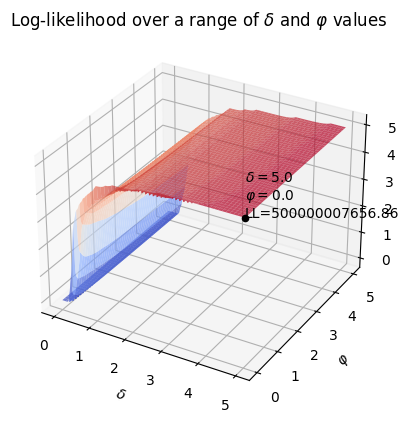

<Figure size 640x480 with 0 Axes>

In [12]:
# Set up the parameters for the grid search
points = 500
theta_array = np.linspace(0.001, 5, points)
lambda_array = np.linspace(0.0001, 5, points)

T, L = np.meshgrid(theta_array, lambda_array)

LL = np.empty((len(theta_array), len(lambda_array)))
epsilon = 1e-10
gamma = 1  # Set gamma to 1

for i, theta in enumerate(theta_array):
    for j, lambd in enumerate(lambda_array):
        term1 = 1 + 2 * theta * x
        term2 = np.exp(-2 * theta * x)

        safe_x = np.maximum(x, epsilon)
        safe_term1_term2 = np.maximum(term1 * term2, epsilon)
        safe_denominator = np.maximum(1 - (1 - term1 * term2) ** lambd, epsilon)
        safe_numerator_exp = np.maximum((1 - term1 * term2) ** lambd, epsilon)

        ll = (
            np.log(gamma * theta**2 * safe_x) -
            2 * theta * x +
            lambd * np.log(1 - safe_term1_term2) -
            2 * np.log(safe_denominator) -
            gamma * safe_numerator_exp / safe_denominator
        )

        LL[i][j] = -ll.sum()

LL_max = LL.max()
idx = np.where(LL == LL_max)
theta_fit = theta_array[idx[0]][0]
lambda_fit = lambda_array[idx[1]][0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, L, LL.transpose(), cmap="coolwarm", linewidth=1, antialiased=True, alpha=0.7, zorder=0)
ax.set_xlabel(r'$\delta$')
ax.set_ylabel(r'$\varphi$')
ax.set_zlabel('Log-likelihood')
ax.scatter([theta_fit], [lambda_fit], [LL_max], color='k', zorder=1)
text_string = str(r'$\delta=$'+str(round(theta_fit, 2))+'\n'+r'$\varphi=$'+str(round(lambda_fit, 2))+'\nLL='+str(round(LL_max, 2)))
ax.text(x=theta_fit, y=lambda_fit, z=LL_max+0.1, s=text_string)
ax.computed_zorder = False
plt.title(r'Log-likelihood over a range of $\delta$ and $\varphi$ values')
plt.savefig('mle1.png')

plt.show()

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(z=LL, x=theta_array, y=lambda_array ,# y= data
                                )])

# Add title and labels
fig.update_layout(title='3D Surface Plot of Log-Likelihood',
                  scene=dict(xaxis_title='Delta', yaxis_title='Varphi', zaxis_title='Log-Likelihood'))
plt.savefig('mleplt2.png')
# Show the plot
fig.show()

In [13]:
  # Function to handle array inputs
def evaluate_functions_on_array(x_array):
    pdf_results = []
    sf_results = []
    hf_results = []
    rhrf_results = []
    chf_results = []
    m_results = []
    w_results = []

  
    for x in x_array:
        pdf_results.append(gamma_pdf(gamma_param=0.2, theta=0.03, lambd=0.05, x=x))
        sf_results.append(gamma_sf(gamma_param=0.2, theta=0.03, lambd=0.05, x=x))
        hf_results.append(gamma_hf(gamma_param=0.2, theta=0.03, lambd=0.05, x=x))
        rhrf_results.append(gamma_rhrf(gamma_param=0.2, theta=0.03, lambd=0.05, x=x))
        chf_results.append(gamma_chf(gamma_param=0.2, theta=0.03, lambd=0.05, x=x))
        m_results.append(m_function(x=x, gamma_param=0.8, theta=1.3, lambd=0.5))
        w_results.append(w_function(x=x, gamma_param=0.2, theta=0.03, lambd=0.05))
    
    return {
        'pdf': np.array(pdf_results),
        'sf': np.array(sf_results),
        'hf': np.array(hf_results),
        'rhrf': np.array(rhrf_results),
        'chf': np.array(chf_results),
        'm': np.array(m_results),
        'w': np.array(w_results)
    }
 
# Evaluate the functions on the data points
results = evaluate_functions_on_array(data)

# Convert the results to a DataFrame
results_df = pd.DataFrame({
    'x': data,
    'pdf': results['pdf'],
    'sf': results['sf'],
    'hf': results['hf'],
    'rhrf': results['rhrf'],
    'chf': results['chf'],
    'm': results['m'],
    'w': results['w']
})

#print(results_df)

# Compute the correlation matrix
correlation_matrix = results_df.corr()
print(correlation_matrix)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    text=correlation_matrix.values,
    texttemplate="%{text:.2f}",
    textfont={"size":12}
))

# Add title and labels
fig.update_layout(
    title='Heatmap of Correlation between Data, PDF, SF, HF, RHRF, CHF, MRLTF, and MWTF',
    xaxis_title='Variable',
    yaxis_title='Variable',
    coloraxis_colorbar=dict(title="Correlation")
)

# Show the plot
fig.show()

             x       pdf        sf        hf      rhrf       chf         m  \
x     1.000000 -0.779510 -0.825020  0.934137 -0.864200  0.967820 -1.000000   
pdf  -0.779510  1.000000  0.371454 -0.814041  0.980925 -0.809397  0.779510   
sf   -0.825020  0.371454  1.000000 -0.593184  0.534242 -0.676057  0.825020   
hf    0.934137 -0.814041 -0.593184  1.000000 -0.842949  0.993823 -0.934137   
rhrf -0.864200  0.980925  0.534242 -0.842949  1.000000 -0.856799  0.864200   
chf   0.967820 -0.809397 -0.676057  0.993823 -0.856799  1.000000 -0.967820   
m    -1.000000  0.779510  0.825020 -0.934137  0.864200 -0.967820  1.000000   
w     0.998801 -0.778692 -0.806619  0.948755 -0.858132  0.977915 -0.998801   

             w  
x     0.998801  
pdf  -0.778692  
sf   -0.806619  
hf    0.948755  
rhrf -0.858132  
chf   0.977915  
m    -0.998801  
w     1.000000  


In [14]:
# Create a DataFrame for each variable
df_data = pd.DataFrame({'Value': results_df['x'], 'Category': ['Data'] * len(data)})
df_pdf = pd.DataFrame({'Value': results_df['pdf'], 'Category': ['PDF'] * len(data)})
df_sf = pd.DataFrame({'Value': results_df['sf'], 'Category': ['SF'] * len(data)})
df_hf = pd.DataFrame({'Value': results_df['hf'], 'Category': ['HF'] * len(data)})
df_rhrf = pd.DataFrame({'Value': results_df['rhrf'], 'Category': ['RHRF'] * len(data)})
df_chf = pd.DataFrame({'Value': results_df['chf'], 'Category': ['CHF'] * len(data)})
df_m = pd.DataFrame({'Value': results_df['m'], 'Category': ['M'] * len(data)})
df_w = pd.DataFrame({'Value': results_df['w'], 'Category': ['W'] * len(data)})

# Define color sequences
colors = {
    'Data': '#9467bd',  # Purple
    'PDF': '#008080',   # Blue
    'SF': '#ff7f0e',    # Orange
    'HF': '#2ca02c',    # Green
    'RHRF': '#d62728',  # Red
    'CHF': '#1f77b4',   # Light blue
    'M': '#8c564b',     # Brown
    'W': '#e377c2'      # Pink
}

# Helper function to create violin plots with additional styling
def create_violin_plot(df, title, color):
    fig = px.violin(df, y='Value', x='Category', box=True, points="all", title=title,
                    color='Category', color_discrete_sequence=[color])
    
    # Update layout for more attractive styling
    fig.update_layout(
        title=dict(x=0.5, font=dict(size=20)),
        yaxis=dict(title='Value', gridcolor='rgba(0, 0, 0, 0.1)'),
        xaxis=dict(title='Category', gridcolor='rgba(0, 0, 0, 0.1)'),
        plot_bgcolor='white',
        showlegend=False
    )
    
    # Add shadow effect to violin plot
    fig.update_traces(marker_line_width=0.5, opacity=0.9, selector=dict(type='violin'))
    
    # Show the plot
    fig.show()

# Create and show violin plots
create_violin_plot(df_data, 'Violin Plot for Data', colors['Data'])
create_violin_plot(df_pdf, 'Violin Plot for Probability Density Function', colors['PDF'])
create_violin_plot(df_sf, 'Violin Plot for Survival Function', colors['SF'])
create_violin_plot(df_hf, 'Violin Plot for Hazard Rate Function', colors['HF'])
create_violin_plot(df_rhrf, 'Violin Plot for Reverse Hazard Rate Function', colors['RHRF'])
create_violin_plot(df_chf, 'Violin Plot for Cumulative Hazard Rate Function', colors['CHF'])
create_violin_plot(df_m, 'Violin Plot for Mean Residual Life Functions', colors['M'])
create_violin_plot(df_w, 'Violin Plot for Mean Waiting Time Functions', colors['W'])

In [15]:
import itertools

 
# Extract data from the DataFrame
variables = {
    'pdf': results_df['pdf'],
    'sf': results_df['sf'],
    'hf': results_df['hf'],
    'rhrf': results_df['rhrf'],
    'chf': results_df['chf'],
    'm': results_df['m'],
    'w': results_df['w']
}

# Get all possible combinations of the 7 variables taken 3 at a time
combinations = list(itertools.combinations(variables.keys(), 3))

for combo in combinations:
    x_var, y_var, z_var = combo
    x = variables[x_var]
    y = variables[y_var]
    z = variables[z_var]

    # Create meshgrid for y and z
    y, z = np.meshgrid(y, z)

    # Create a 3D surface plot
    fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

    # Add title and labels
    fig.update_layout(title=f'3D Surface Plot of {x_var}, {y_var}, and {z_var}',
                      scene=dict(xaxis_title=x_var, yaxis_title=y_var, zaxis_title=z_var))

    # Show the plot
    fig.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
# Create some data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Plot the data
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Save the plot in different formats
plt.savefig('figure.png')
plt.savefig('figure.pdf')
plt.savefig('figure.svg')
plt.savefig('figure.eps')
plt.savefig('figure.jpg')
plt.savefig('figure.tiff')
plt.savefig('figure.ps')

# GIF requires a sequence of images
import imageio
frames = []
for i in range(10):
    plt.plot(x, np.sin(x + i / 10.0))
    plt.savefig('frame.png')
    frames.append(imageio.imread('frame.png'))
    plt.clf()

imageio.mimsave('figure.gif', frames, duration=0.5)


/tmp/ipykernel_18/1492692122.py:29: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



<Figure size 640x480 with 0 Axes>